<a href="https://colab.research.google.com/github/madixson/EmployeeChurnHR_Project/blob/main/Data_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect Notebook to Google Drive
For file accessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Necessary Libraries

In [29]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load and View Data
**Note: Edit the correct file pathing to your datasets

In [24]:
# Load in CSV dataset
df_raw = pd.read_csv('/content/drive/MyDrive/EmployeeChurnProject/EmployeeData.csv')

# View dataset
df_raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Cleaning

### Null Value Removal
There were no null values to removed from this dataset.

In [ ]:
# Remove null values
df = df_raw.dropna()

### Boxplot
The time_spend_company variable solely had identifiable outliers, however we chose the include them in our dataset regardless due to its relevance for the churn analysis.

satisfaction_level


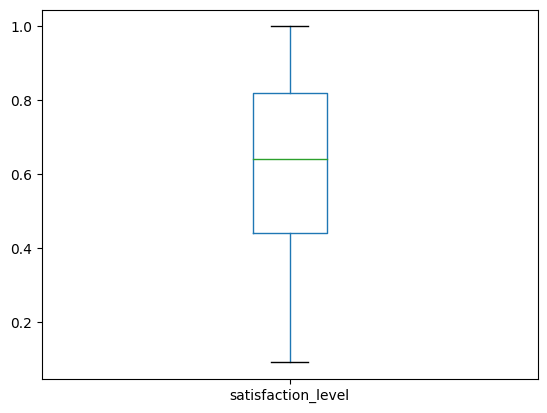

last_evaluation


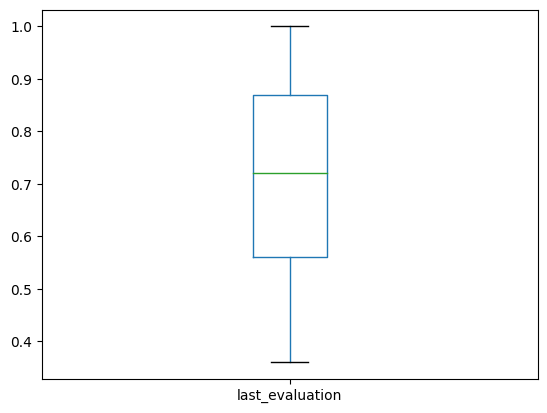

number_project


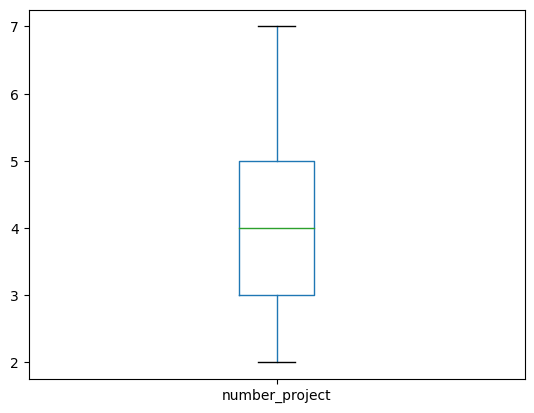

average_montly_hours


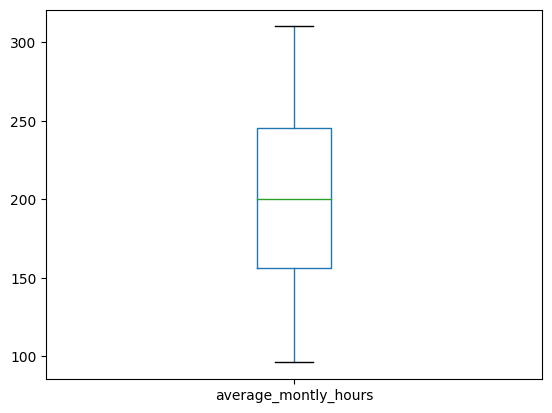

time_spend_company


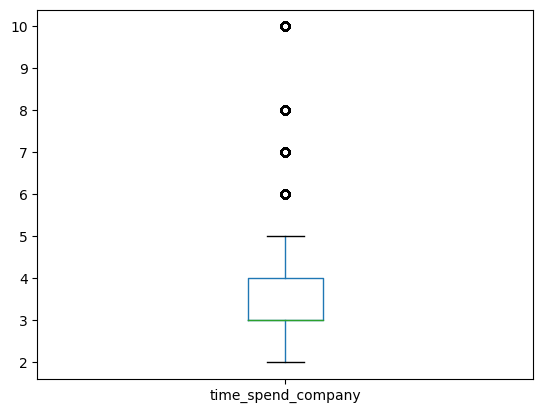

In [ ]:
# Using boxplot to identify any outliers or extreme values
def plot_boxplot(df, feature):
    print(feature)
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

# Boxplots for all of our numerical values
plot_boxplot(df, 'satisfaction_level')
plot_boxplot(df, 'last_evaluation')
plot_boxplot(df, 'number_project')
plot_boxplot(df, 'average_montly_hours')
plot_boxplot(df, 'time_spend_company')

### Encode Categorical Variables as Numerical

In [20]:
# Encode categorical variables using LabelEncoder
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Create a copy of the original dataset and extract target variable
orig = df.copy()
target = orig.pop('left')

# View updated numerical dataset
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0      7   
1                   6              0     1                      0      7   
2                   4              0     1                      0      7   
3                   5              0     1                      0      7   
4                   3              0     1                      0      7   

   salary  
0       1  
1       2  
2       2  
3       1  
4 

### Save the new dataset after preprocessing
**Note: Edit the correct file pathing to your datasets

In [33]:
# Save preprocessed data as a new CSV file
df.to_csv('/content/drive/MyDrive/EmployeeChurnProject/NewEmployeeData.csv', index=False)

# Save target variable for analysis
target.to_csv('/content/drive/MyDrive/EmployeeChurnProject/target_col.csv', index=False)

## Exploratory Analysis

In [21]:
# Set color palette for graphing
pal = ['#0f39f7', '#fcf00a']
b = '#0f39f7'
y = '#fcf00a'

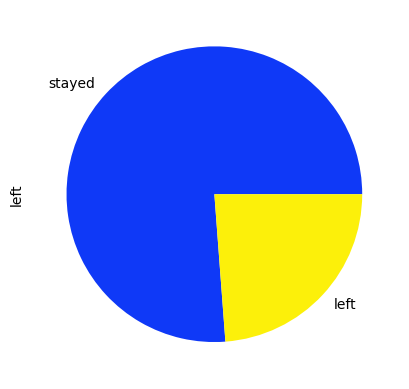

In [27]:
# Pi chart for target variable
df.replace((1, 0), ('left', 'stayed'), inplace=True)
df['left'].value_counts().plot.pie( colors = pal)
plt.show()

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


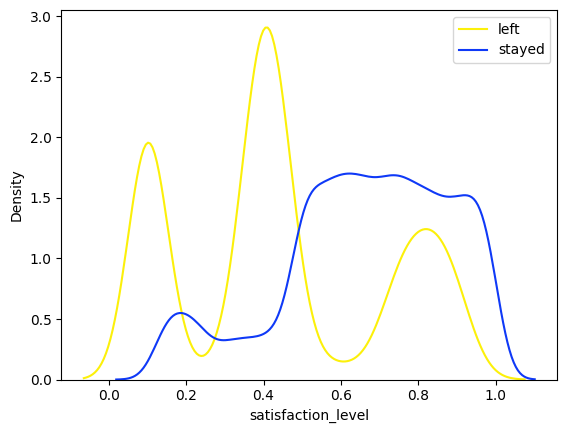

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


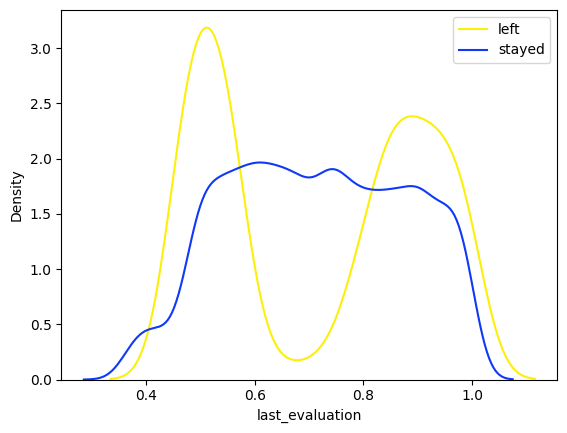

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


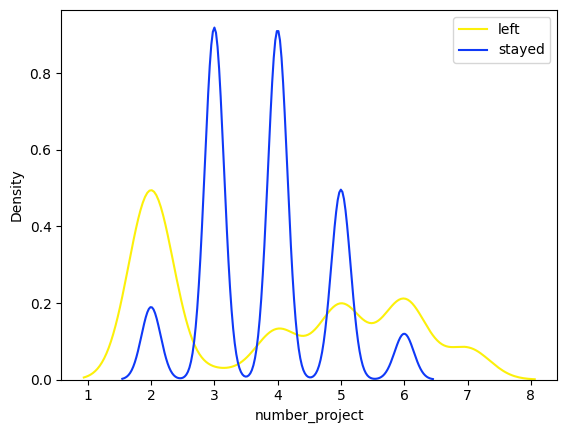

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


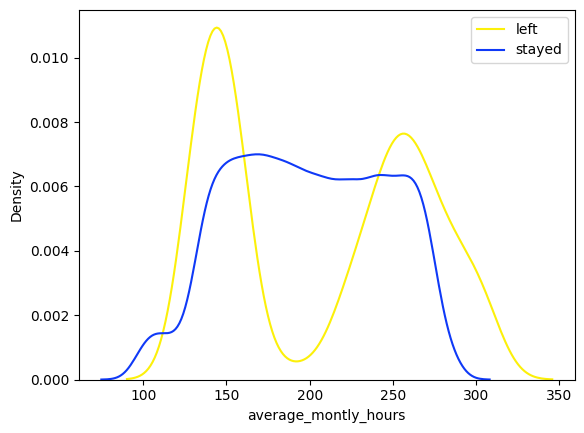

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


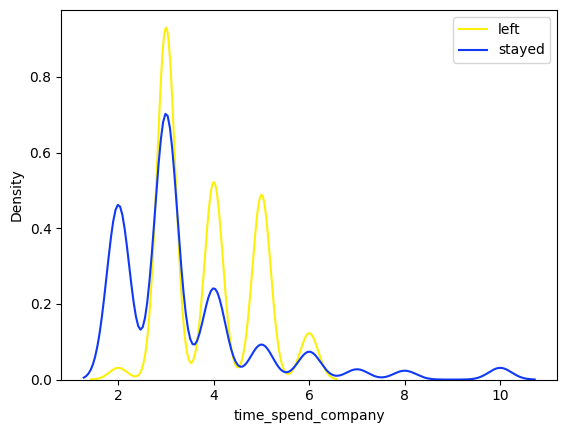

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


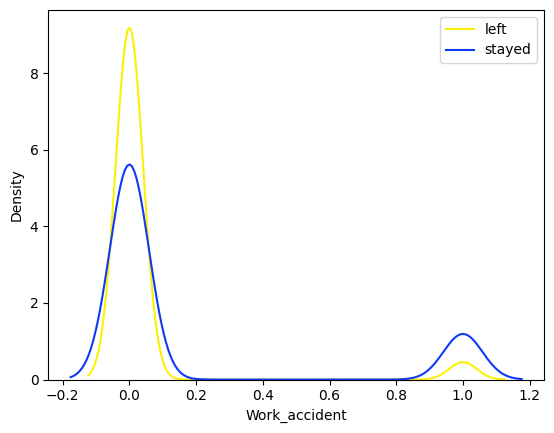

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density p

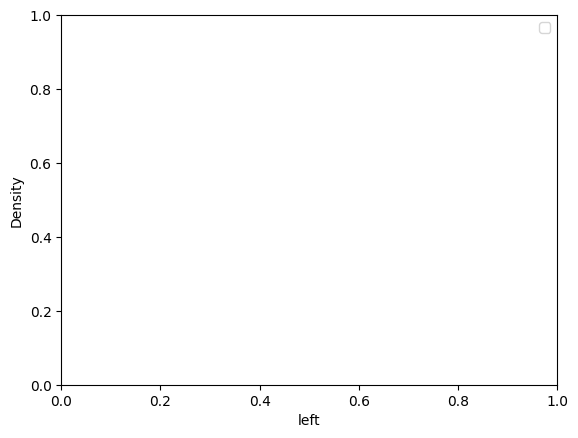

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


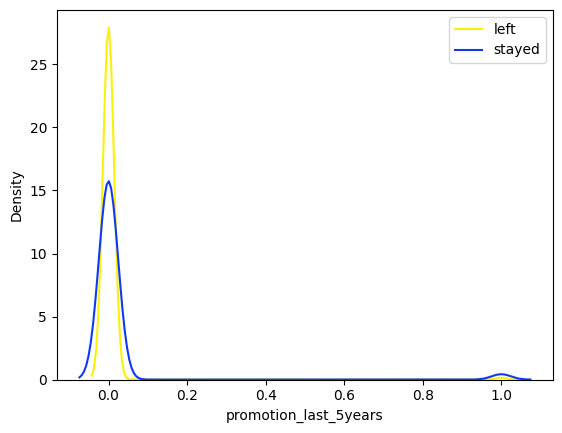

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


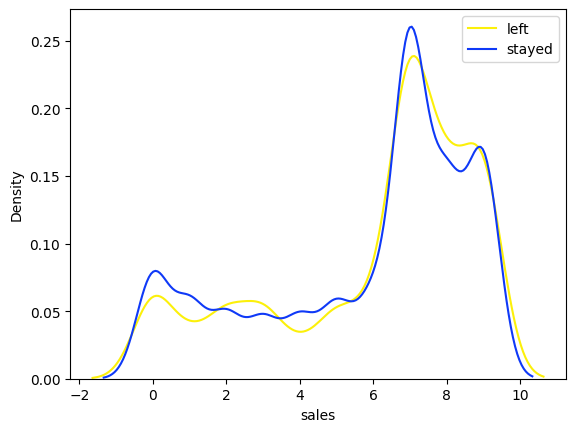

<ipython-input-31-795378f18686>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-31-795378f18686>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


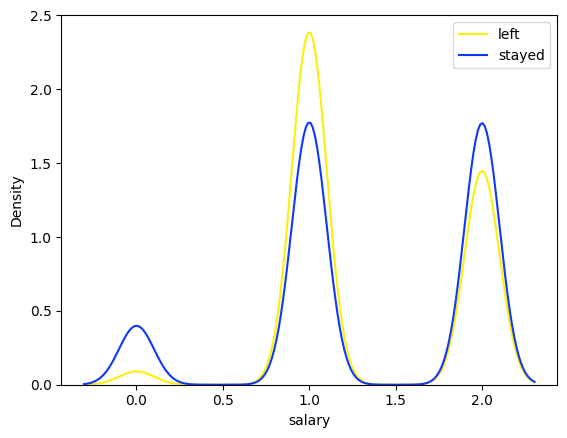

In [31]:
# Compare Left vs Stayed Employees using seaborn distplot
def compare(df, ft):
    # Plot distribution for left employees and stayed employees
    sns.distplot(c1[ft], color = y, hist=False)
    sns.distplot(c2[ft], color = b, hist=False)
    # Add legend
    plt.legend(labels=["left","stayed"])
    # Show plot
    plt.show()

# Replace 'left' and 'stayed' values with 1 and 0, respectively
df.replace(('left', 'stayed'), (1,0), inplace=True)
g = df.groupby(['left'])
c1 = g.get_group(1) # Group for left employees
c2 = g.get_group(0) # Group for stayed employees

# Graph and compare the two groups
for feature in df:
    compare(df, feature)

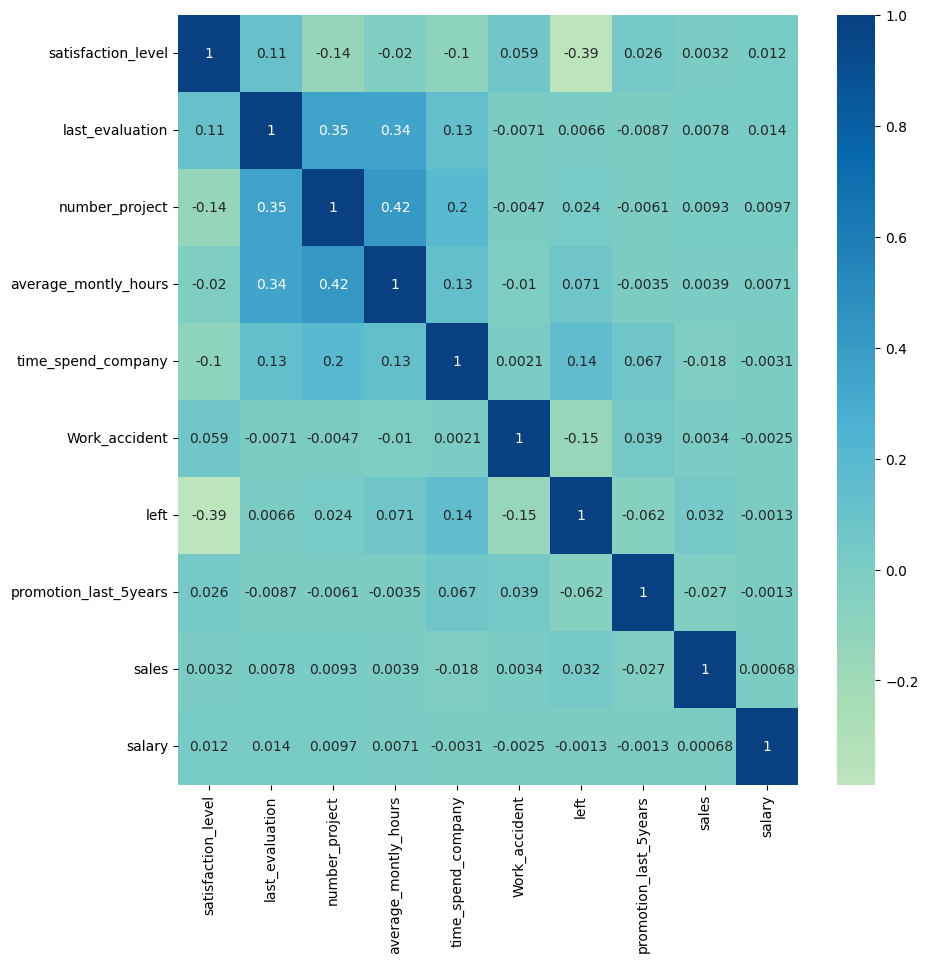

In [32]:
# Correlation Heatmap
corrmat = df.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True,cmap = 'GnBu',center=0)
plt.show()